In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# read the sensor dataset
df_skin = pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/master_skin_T.csv", sep = "\t")

In [ ]:
df_hr = pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/HeartRateConsolidated.csv", sep = ",")

In [ ]:
df_acc= pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/master_activity.csv", sep = "\t")

In [ ]:
df_wea = pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/master_weather.csv", sep = ",")

In [ ]:
# read the survey data
df_com = pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/comfort_survey.csv", sep = ",")
df_back = pd.read_csv("/content/drive/Shareddrives/DL Project/anonymous data_master/background_survey.csv", sep = ",")

**Occupant 1**

In [ ]:
df_skin = df_skin.rename(columns={'Name ID': 'ID'})
df_skin = df_skin.replace('ID_14', 14)

In [ ]:
df_skin_1 = df_skin.query('ID == 14')
df_skin_1

,Time,Position,Value,Serial No.,ID,Calibrated Value
949408,2017-05-13 09:57:01,Ankle,24.89,3.50E+53,14,24.29
949409,2017-05-13 09:58:01,Ankle,26.01,3.50E+53,14,25.41
949410,2017-05-13 09:59:01,Ankle,28.57,3.50E+53,14,27.97
949411,2017-05-13 10:00:01,Ankle,29.70,3.50E+53,14,29.09
949412,2017-05-13 10:01:01,Ankle,30.26,3.50E+53,14,29.66
...,...,...,...,...,...,...
1024865,2017-06-02 13:38:01,Wrist,23.83,84000000508C3841,14,23.83
1024866,2017-06-02 13:39:01,Wrist,23.83,84000000508C3841,14,23.83
1024867,2017-06-02 13:40:01,Wrist,23.83,84000000508C3841,14,23.83
1024868,2017-06-02 13:41:01,Wrist,23.83,84000000508C3841,14,23.83


In [ ]:
df_skin_1.isna().sum()

Time                0
Position            0
Value               0
Serial No.          0
ID                  0
Calibrated Value    0
dtype: int64

<Axes: >

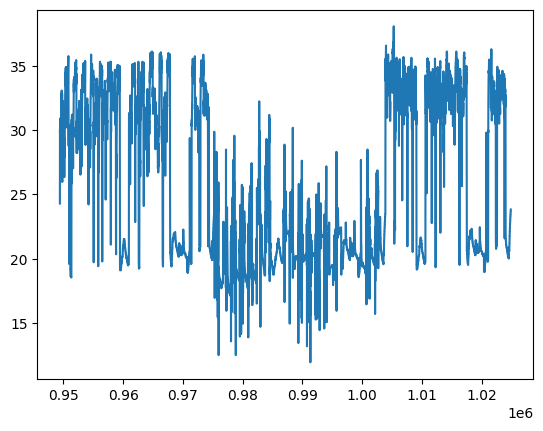

In [ ]:
df_skin_1['Calibrated Value'].plot()

<ipython-input-97-510bc40d3976>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skin_1['Calibrated Value'] = scaler.fit_transform(df_skin_1['Calibrated Value'].values.reshape(-1, 1))


<Axes: >

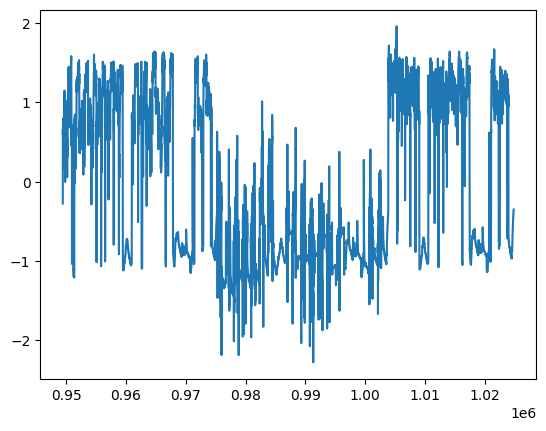

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_skin_1['Calibrated Value'] = scaler.fit_transform(df_skin_1['Calibrated Value'].values.reshape(-1, 1))
df_skin_1['Calibrated Value'].plot()

In [ ]:
df_hr = df_hr.rename(columns={'Sub.ID': 'ID'})
df_hr = df_hr.replace('ID_14', 14)

In [ ]:
df_hr_1 = df_hr.query('ID == 14')
df_hr_1

,Time,HR,ID
1261045,2017-05-13 09:52:33,69.0,14
1261046,2017-05-13 09:52:34,69.0,14
1261047,2017-05-13 09:52:35,69.0,14
1261048,2017-05-13 09:52:36,69.0,14
1261049,2017-05-13 09:52:37,69.0,14
...,...,...,...
2109684,2017-06-01 20:44:03,NaN,14
2109685,2017-06-01 20:44:04,NaN,14
2109686,2017-06-01 20:44:05,NaN,14
2109687,2017-06-01 20:44:06,NaN,14


In [ ]:
df_hr_1.isna().sum()

Time        0
HR      30307
ID          0
dtype: int64

In [ ]:
df_hr_1['HR'] = df_hr_1['HR'].fillna(method='ffill')
df_hr_1

<ipython-input-101-bee1b4495e01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_1['HR'] = df_hr_1['HR'].fillna(method='ffill')


,Time,HR,ID
1261045,2017-05-13 09:52:33,69.0,14
1261046,2017-05-13 09:52:34,69.0,14
1261047,2017-05-13 09:52:35,69.0,14
1261048,2017-05-13 09:52:36,69.0,14
1261049,2017-05-13 09:52:37,69.0,14
...,...,...,...
2109684,2017-06-01 20:44:03,80.0,14
2109685,2017-06-01 20:44:04,80.0,14
2109686,2017-06-01 20:44:05,80.0,14
2109687,2017-06-01 20:44:06,80.0,14


<Axes: >

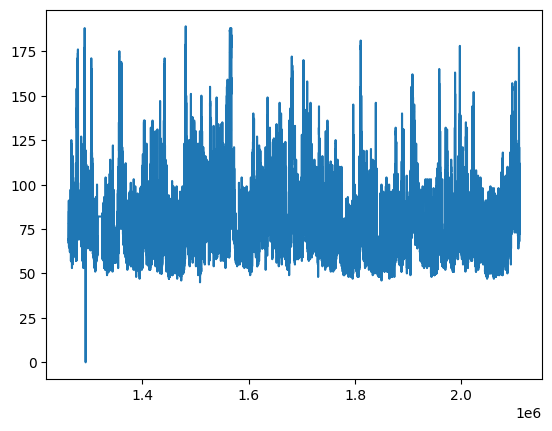

In [ ]:
df_hr_1['HR'].plot()

<ipython-input-103-2298d9bd179f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_1['HR'] = df_hr_1['HR'].replace(0, df_hr_1['HR'].median())


<Axes: >

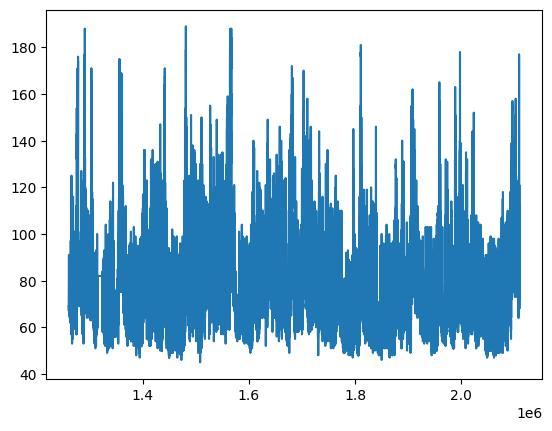

In [ ]:
#replace the zero values
df_hr_1['HR'] = df_hr_1['HR'].replace(0, df_hr_1['HR'].median())
df_hr_1['HR'].plot()

<ipython-input-104-c11106756944>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_1['HR'] = scaler.fit_transform(df_hr_1['HR'].values.reshape(-1, 1))


<Axes: >

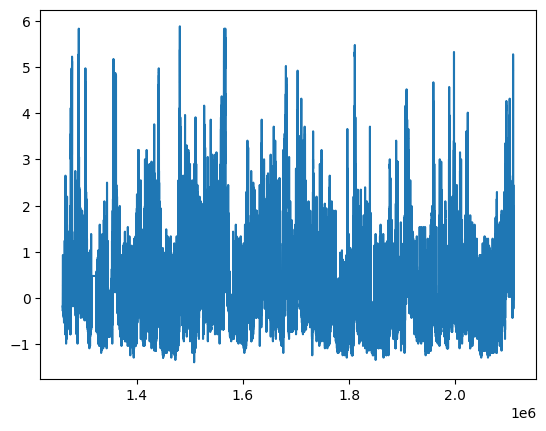

In [ ]:
df_hr_1['HR'] = scaler.fit_transform(df_hr_1['HR'].values.reshape(-1, 1))
df_hr_1['HR'].plot()

In [ ]:
df_acc = df_acc.rename(columns={'Name ID': 'ID'})
df_acc = df_acc.replace('ID_14', 14)

In [ ]:
df_acc_1 = df_acc.query('ID == 14')
df_acc_1

,Date_time,X,Y,Z,ID
18154544,2017-05-13 10:02:56.000,-5.583,4.817,5.966,14
18154545,2017-05-13 10:02:56.010,-5.688,4.826,5.966,14
18154546,2017-05-13 10:02:56.050,-5.631,4.750,5.918,14
18154547,2017-05-13 10:02:56.060,-5.640,4.865,5.851,14
18154548,2017-05-13 10:02:56.070,-5.631,4.913,5.861,14
...,...,...,...,...,...
20004756,2017-05-14 21:38:58.403,-0.201,5.229,7.431,14
20004757,2017-05-14 21:38:58.413,-0.344,5.200,7.422,14
20004758,2017-05-14 21:38:58.423,-0.402,5.133,7.403,14
20004759,2017-05-14 21:38:58.433,-0.306,5.075,7.364,14


In [ ]:
df_acc_1.isna().sum()

Date_time    0
X            0
Y            0
Z            0
ID           0
dtype: int64

In [ ]:
df_acc_1[['X', 'Y', 'Z']]= scaler.fit_transform(df_acc_1[['X', 'Y', 'Z']])
df_acc_1[['X', 'Y', 'Z']]

<ipython-input-108-ec751489bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc_1[['X', 'Y', 'Z']]= scaler.fit_transform(df_acc_1[['X', 'Y', 'Z']])


,X,Y,Z
18154544,-1.442118,0.689407,-0.054783
18154545,-1.472974,0.692058,-0.054783
18154546,-1.456224,0.669666,-0.064011
18154547,-1.458869,0.703549,-0.076893
18154548,-1.456224,0.717691,-0.074971
...,...,...,...
20004756,0.139501,0.810793,0.226887
20004757,0.097477,0.802249,0.225157
20004758,0.080433,0.782509,0.221504
20004759,0.108645,0.765421,0.214005


In [ ]:
df_com = df_com.rename(columns={'Name.ID': 'ID'})
df_com = df_com.replace('ID_14', 14)

In [ ]:
df_com.isna().sum()

Time          0
therm_sens    0
therm_pref    0
location      0
ID            0
dtype: int64

In [ ]:
df_com_1 = df_com.query('ID == 14')
df_com_1_prf = df_com_1['therm_pref']
df_com_1_prf

3535    No Change
3536    No Change
3537       Warmer
3538    No Change
3539       Cooler
          ...    
3852    No Change
3853    No Change
3854    No Change
3855    No Change
3856    No Change
Name: therm_pref, Length: 322, dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
df_com_1_prf = encoder.fit_transform(df_com_1_prf.values.reshape(-1,1))
df_com_1_prf

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

In [ ]:
#df_wea['Humidity'] = df_wea['Humidity'].str.strip('%') 
df_wea['Humidity'] = df_wea['Humidity'].astype(float)
df_wea[['Temperature ', 'Humidity']]= scaler.fit_transform(df_wea[['Temperature ', 'Humidity']])
df_wea

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind gust,Pressure,Precip Rate,Precip Accu,UV,Solar
0,8/31/2015 0:53,0.350968,NaN,0.160199,NaN,No wind,NaN,NaN,NaN,NaN,NaN,NaN
1,8/31/2015 1:53,0.350968,NaN,0.328958,NaN,3.1,NaN,NaN,NaN,NaN,NaN,NaN
2,8/31/2015 2:53,0.487905,NaN,0.272705,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN
3,8/31/2015 3:53,0.738956,NaN,0.160199,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
4,8/31/2015 4:53,0.738956,NaN,0.160199,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
44738,6/28/2017 23:30,-0.516300,10.8,0.891486,SSE,1.3,2.2,29.9,0.0,0.0,0.0,0.0
44739,6/28/2017 23:40,-0.539122,10.9,0.947739,East,2.7,4.5,29.9,0.0,0.0,0.0,0.0
44740,6/28/2017 23:45,-0.539122,10.9,0.947739,East,1.3,4.0,29.9,0.0,0.0,0.0,0.0
44741,6/28/2017 23:50,-0.539122,10.9,0.947739,SSE,1.8,4.9,29.9,0.0,0.0,0.0,0.0


In [ ]:
df_skin_1 = df_skin_1.iloc[57:]
df_skin_1 = df_skin_1.iloc[:-57]
df_skin_1

,Time,Position,Value,Serial No.,ID,Calibrated Value
949465,2017-05-13 10:54:01,Ankle,31.38,3.50E+53,14,0.775572
949466,2017-05-13 10:55:01,Ankle,31.38,3.50E+53,14,0.775572
949467,2017-05-13 10:56:01,Ankle,31.32,3.50E+53,14,0.765829
949468,2017-05-13 10:57:01,Ankle,31.32,3.50E+53,14,0.765829
949469,2017-05-13 10:58:01,Ankle,31.13,3.50E+53,14,0.734978
...,...,...,...,...,...,...
1024808,2017-06-02 12:41:01,Wrist,23.33,84000000508C3841,14,-0.434125
1024809,2017-06-02 12:42:01,Wrist,23.33,84000000508C3841,14,-0.434125
1024810,2017-06-02 12:43:01,Wrist,23.33,84000000508C3841,14,-0.434125
1024811,2017-06-02 12:44:01,Wrist,23.33,84000000508C3841,14,-0.434125


In [ ]:
df_skin_1_2d = df_skin_1['Calibrated Value']
df_skin_1_2d = df_skin_1_2d.values.reshape(322, 234)
df_skin_1_2d

array([[ 0.77557186,  0.77557186,  0.76582933, ...,  0.6635328 ,
         0.67489909,  0.64404775],
       [ 0.77557186,  0.78531439,  0.97854116, ...,  0.734978  ,
         0.74472053,  0.70412667],
       [ 0.6635328 ,  0.74472053,  0.72523547, ...,  0.41022711,
         0.42159339,  0.42159339],
       ...,
       [-0.81083622, -0.81083622, -0.81083622, ..., -0.911509  ,
        -0.911509  , -0.911509  ],
       [-0.92287528, -0.92287528, -0.92287528, ..., -0.87091514,
        -0.87091514, -0.87091514],
       [-0.87091514, -0.87091514, -0.87091514, ..., -0.43412519,
        -0.43412519, -0.43412519]])

In [ ]:
df_hr_1 = df_hr_1.iloc[87:]
df_hr_1 = df_hr_1.iloc[:-87]
df_hr_1

,Time,HR,ID
1261132,2017-05-13 09:54:00,-0.125751,14
1261133,2017-05-13 09:54:01,-0.125751,14
1261134,2017-05-13 09:54:02,-0.176216,14
1261135,2017-05-13 09:54:03,-0.176216,14
1261136,2017-05-13 09:54:04,-0.176216,14
...,...,...,...
2109597,2017-06-01 20:42:36,0.378907,14
2109598,2017-06-01 20:42:37,0.378907,14
2109599,2017-06-01 20:42:38,0.378907,14
2109600,2017-06-01 20:42:39,0.378907,14


In [ ]:
df_hr_1_2d = df_hr_1['HR']
df_hr_1_2d = df_hr_1_2d.values.reshape(322, 2635)
df_hr_1_2d

array([[-0.1257505 , -0.1257505 , -0.17621624, ..., -0.37807916,
        -0.37807916, -0.37807916],
       [-0.37807916, -0.37807916, -0.37807916, ..., -0.22668197,
        -0.32761343, -0.32761343],
       [-0.32761343, -0.32761343, -0.37807916, ..., -0.68087355,
        -0.68087355, -0.63040782],
       ...,
       [ 2.39753609,  2.39753609,  2.39753609, ...,  0.9844956 ,
         1.03496133,  1.08542706],
       [ 1.08542706,  1.03496133,  0.9844956 , ...,  0.42937255,
         0.42937255,  0.58076974],
       [ 0.58076974,  0.58076974,  0.47983828, ...,  0.37890681,
         0.37890681,  0.37890681]])

In [ ]:
df_acc_1 = df_acc_1.iloc[2:]
df_acc_1 = df_acc_1.iloc[:-3]
df_acc_1

,Date_time,X,Y,Z,ID
18154546,2017-05-13 10:02:56.050,-1.456224,0.669666,-0.064011,14
18154547,2017-05-13 10:02:56.060,-1.458869,0.703549,-0.076893,14
18154548,2017-05-13 10:02:56.070,-1.456224,0.717691,-0.074971,14
18154549,2017-05-13 10:02:56.080,-1.450640,0.762769,-0.106310,14
18154550,2017-05-13 10:02:56.090,-1.461807,0.711798,-0.074971,14
...,...,...,...,...,...
20004753,2017-05-14 21:38:58.373,0.111583,0.850273,0.228810,14
20004754,2017-05-14 21:38:58.383,0.159191,0.850273,0.241692,14
20004755,2017-05-14 21:38:58.403,0.139501,0.810793,0.226887,14
20004756,2017-05-14 21:38:58.403,0.139501,0.810793,0.226887,14


In [ ]:
df_acc_1_2d = df_acc_1[['X', 'Y', 'Z']]
df_acc_1_2d = df_acc_1_2d.values.reshape(322, 17238)
df_acc_1_2d

array([[-1.45622366,  0.66966643, -0.06401145, ...,  0.43190375,
         0.41275082,  0.51047988],
       [ 0.42367534,  0.41275082,  0.50682682, ...,  0.33081179,
        -1.11342222,  0.66160109],
       [ 0.32787308, -1.11342222,  0.66160109, ...,  0.20973654,
        -0.80877687,  0.67986637],
       ...,
       [-0.33598371,  0.42983924,  0.26553277, ...,  0.1115833 ,
        -0.83411488,  0.67621332],
       [ 0.11422815, -0.83411488,  0.67448292, ...,  0.32787308,
         0.83613125,  0.2397691 ],
       [ 0.29701652,  0.83053332,  0.29687216, ...,  0.09747745,
         0.80224903,  0.22515687]])

In [ ]:
df_wea_1 = df_wea.iloc[153:]
df_wea_1 = df_wea_1.iloc[:-154]
df_wea_1

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind gust,Pressure,Precip Rate,Precip Accu,UV,Solar
153,9/9/2015 11:53,3.272290,NaN,-2.764947,NaN,3.1,NaN,NaN,NaN,NaN,NaN,NaN
154,9/9/2015 12:53,3.660278,NaN,-2.483683,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
155,9/9/2015 13:53,4.025443,NaN,-2.821200,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN
156,9/9/2015 14:53,4.162380,NaN,-2.989959,NaN,5.8,NaN,NaN,NaN,NaN,NaN,NaN
157,9/9/2015 15:53,3.911329,NaN,-2.933706,NaN,6.3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
44584,6/28/2017 8:55,-0.516300,11.4,1.060244,SSW,0.9,1.8,30.0,0.0,0.0,0.5,68.0
44585,6/28/2017 9:00,-0.516300,11.4,1.060244,SW,0.4,1.8,30.0,0.0,0.0,0.5,65.0
44586,6/28/2017 9:05,-0.493477,11.4,1.060244,SE,0.9,2.7,30.0,0.0,0.0,0.5,71.0
44587,6/28/2017 9:10,-0.493477,11.5,1.060244,South,0.9,1.8,30.0,0.0,0.0,0.4,73.0


In [ ]:
df_wea_1_2d = df_wea_1[['Temperature ', 'Humidity']]
df_wea_1_2d = df_wea_1_2d.values.reshape(322, 276)
df_wea_1_2d

array([[ 3.27228954, -2.76494726,  3.66027759, ...,  0.83523292,
         0.23685368,  0.61022166],
       [ 0.23685368,  0.61022166,  0.23685368, ...,  0.16019914,
        -0.15113436,  0.16019914],
       [-0.15113436,  0.16019914, -0.28807132, ..., -1.02110999,
         1.37799498, -1.02110999],
       ...,
       [ 0.32814498,  0.61022166,  0.28249933, ...,  1.17274981,
        -0.42500828,  1.17274981],
       [-0.42500828,  1.17274981, -0.42500828, ...,  0.77898011,
        -0.21960284,  0.77898011],
       [-0.26524849,  0.83523292, -0.26524849, ...,  1.06024418,
        -0.49347675,  1.06024418]])

In [ ]:
import numpy as np

# Assuming all four ndarrays have the same shape along the first axis
merged_array = np.concatenate((df_skin_1_2d, df_hr_1_2d, df_acc_1_2d, df_wea_1_2d), axis=1)

In [ ]:
print(merged_array)

[[ 0.77557186  0.77557186  0.76582933 ...  0.83523292  0.23685368
   0.61022166]
 [ 0.77557186  0.78531439  0.97854116 ...  0.16019914 -0.15113436
   0.16019914]
 [ 0.6635328   0.74472053  0.72523547 ... -1.02110999  1.37799498
  -1.02110999]
 ...
 [-0.81083622 -0.81083622 -0.81083622 ...  1.17274981 -0.42500828
   1.17274981]
 [-0.92287528 -0.92287528 -0.92287528 ...  0.77898011 -0.21960284
   0.77898011]
 [-0.87091514 -0.87091514 -0.87091514 ...  1.06024418 -0.49347675
   1.06024418]]


Test FCN

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
tf.config.run_functions_eagerly(True)

In [ ]:
conv2_layers = []

input_layer = keras.layers.Input((merged_array.shape[1],1))

conv1_layer = keras.layers.Conv1D(filters=128, kernel_size=8, padding='same')(input_layer)
conv1_layer = keras.layers.BatchNormalization()(conv1_layer)
conv1_layer = keras.layers.Activation(activation='relu')(conv1_layer)

conv2_layer = keras.layers.Conv1D(filters=256, kernel_size=5, padding='same')(conv1_layer)
conv2_layer = keras.layers.BatchNormalization()(conv2_layer)
conv2_layer = keras.layers.Activation('relu')(conv2_layer)

conv3_layer = keras.layers.Conv1D(128, kernel_size=3,padding='same')(conv2_layer)
conv3_layer = keras.layers.BatchNormalization()(conv3_layer)
conv3_layer = keras.layers.Activation('relu')(conv3_layer)

gap_layer = keras.layers.GlobalAveragePooling1D()(conv3_layer)

output_layer = keras.layers.Dense(3, activation='softmax')(gap_layer)

model = keras.models.Model(inputs=[input_layer], outputs=output_layer)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20383, 1)]        0         
                                                                 
 conv1d_6 (Conv1D)           (None, 20383, 128)        1152      
                                                                 
 batch_normalization_6 (Batc  (None, 20383, 128)       512       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 20383, 128)        0         
                                                                 
 conv1d_7 (Conv1D)           (None, 20383, 256)        164096    
                                                                 
 batch_normalization_7 (Batc  (None, 20383, 256)       1024      
 hNormalization)                                           

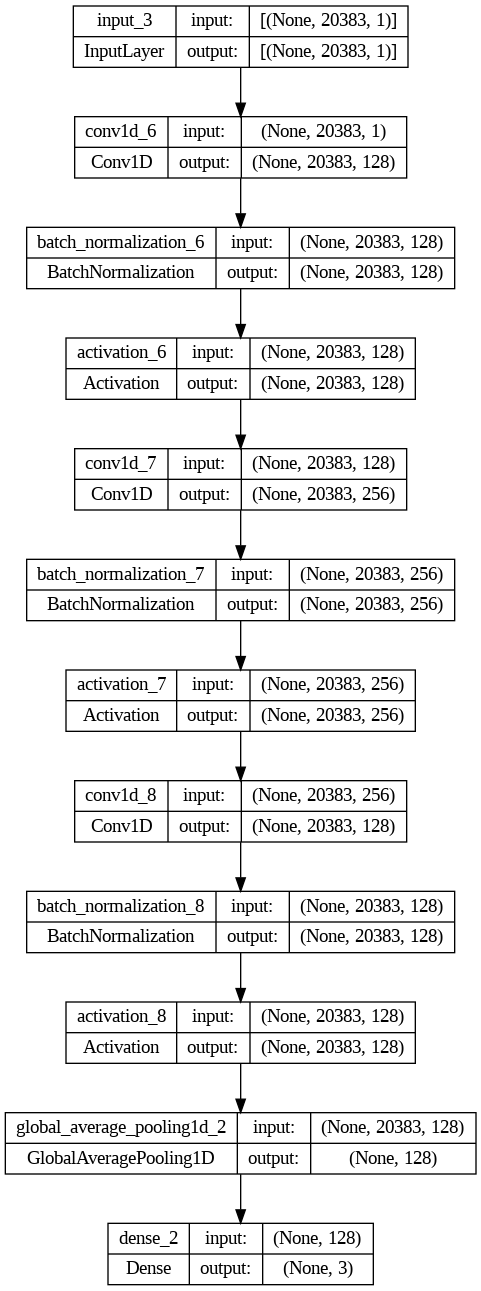

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_train, x_test = train_test_split(merged_array, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(df_com_1_prf, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(257, 20383)

In [ ]:
y_train.shape

(257, 3)

Occupant 1

In [ ]:
model.fit(x=x_train , y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 [==============================] - 15s 1s/step - loss: 1.0933 - accuracy: 0.4380 - val_loss: 1.0743 - val_accuracy: 0.4194
Epoch 2/10
4/4 [==============================] - 1s 328ms/step - loss: 0.9456 - accuracy: 0.5372 - val_loss: 1.0882 - val_accuracy: 0.4194
Epoch 3/10
4/4 [==============================] - 1s 307ms/step - loss: 0.9200 - accuracy: 0.5537 - val_loss: 1.0807 - val_accuracy: 0.4194
Epoch 4/10
4/4 [==============================] - 1s 274ms/step - loss: 0.9143 - accuracy: 0.5620 - val_loss: 1.0664 - val_accuracy: 0.4194
Epoch 5/10
4/4 [==============================] - 1s 277ms/step - loss: 0.9143 - accuracy: 0.5372 - val_loss: 1.0536 - val_accuracy: 0.4194
Epoch 6/10
4/4 [==============================] - 1s 276ms/step - loss: 0.9284 - accuracy: 0.5620 - val_loss: 1.0392 - val_accuracy: 0.4194
Epoch 7/10
4/4 [==============================] - 1s 315ms/step - loss: 0.9052 - accuracy: 0.5289 - val_loss: 1.0198 - val_accuracy: 0.4194
Epoch 8/10
4/4 [=================

Occupant 2

In [ ]:
model.fit(x=x_train , y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 [==============================] - 16s 729ms/step - loss: 1.0931 - accuracy: 0.4752 - val_loss: 1.0381 - val_accuracy: 0.6667
Epoch 2/10
7/7 [==============================] - 3s 472ms/step - loss: 0.9979 - accuracy: 0.5248 - val_loss: 1.0266 - val_accuracy: 0.6863
Epoch 3/10
7/7 [==============================] - 3s 444ms/step - loss: 0.9563 - accuracy: 0.5198 - val_loss: 1.0200 - val_accuracy: 0.5882
Epoch 4/10
7/7 [==============================] - 3s 462ms/step - loss: 0.9648 - accuracy: 0.5198 - val_loss: 0.9050 - val_accuracy: 0.6667
Epoch 5/10
7/7 [==============================] - 3s 450ms/step - loss: 0.9352 - accuracy: 0.5495 - val_loss: 0.9077 - val_accuracy: 0.6471
Epoch 6/10
7/7 [==============================] - 3s 420ms/step - loss: 0.9437 - accuracy: 0.5000 - val_loss: 0.8410 - val_accuracy: 0.6667
Epoch 7/10
7/7 [==============================] - 3s 420ms/step - loss: 0.9500 - accuracy: 0.5396 - val_loss: 0.8585 - val_accuracy: 0.6471
Epoch 8/10
7/7 [==============

Occupant 6

In [ ]:
model.fit(x=x_train , y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 [==============================] - 4s 296ms/step - loss: 1.1928 - accuracy: 0.4560 - val_loss: 1.1183 - val_accuracy: 0.2653
Epoch 2/10
7/7 [==============================] - 1s 190ms/step - loss: 1.0856 - accuracy: 0.4611 - val_loss: 1.0482 - val_accuracy: 0.5510
Epoch 3/10
7/7 [==============================] - 1s 201ms/step - loss: 1.0501 - accuracy: 0.4767 - val_loss: 1.0673 - val_accuracy: 0.4694
Epoch 4/10
7/7 [==============================] - 1s 188ms/step - loss: 1.0583 - accuracy: 0.5078 - val_loss: 1.0274 - val_accuracy: 0.5306
Epoch 5/10
7/7 [==============================] - 1s 177ms/step - loss: 1.0589 - accuracy: 0.5130 - val_loss: 1.0027 - val_accuracy: 0.5510
Epoch 6/10
7/7 [==============================] - 1s 176ms/step - loss: 1.0512 - accuracy: 0.5078 - val_loss: 0.9945 - val_accuracy: 0.5510
Epoch 7/10
7/7 [==============================] - 1s 188ms/step - loss: 1.0268 - accuracy: 0.4870 - val_loss: 0.9935 - val_accuracy: 0.5510
Epoch 8/10
7/7 [===============

Occupant 8

In [ ]:
model.fit(x=x_train , y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9/9 [==============================] - 12s 939ms/step - loss: 0.7001 - accuracy: 0.7730 - val_loss: 0.9558 - val_accuracy: 0.8310
Epoch 2/10
9/9 [==============================] - 4s 491ms/step - loss: 0.4809 - accuracy: 0.8723 - val_loss: 0.9084 - val_accuracy: 0.8028
Epoch 3/10
9/9 [==============================] - 5s 542ms/step - loss: 0.4659 - accuracy: 0.8688 - val_loss: 0.8111 - val_accuracy: 0.8310
Epoch 4/10
9/9 [==============================] - 4s 481ms/step - loss: 0.4652 - accuracy: 0.8652 - val_loss: 0.7358 - val_accuracy: 0.8310
Epoch 5/10
9/9 [==============================] - 4s 476ms/step - loss: 0.4530 - accuracy: 0.8794 - val_loss: 0.6603 - val_accuracy: 0.8310
Epoch 6/10
9/9 [==============================] - 5s 516ms/step - loss: 0.4603 - accuracy: 0.8723 - val_loss: 0.6374 - val_accuracy: 0.8310
Epoch 7/10
9/9 [==============================] - 4s 475ms/step - loss: 0.4486 - accuracy: 0.8759 - val_loss: 0.6143 - val_accuracy: 0.8310
Epoch 8/10
9/9 [==============

Occupant 10

In [ ]:
model.fit(x=x_train , y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 [==============================] - 16s 830ms/step - loss: 1.0834 - accuracy: 0.4412 - val_loss: 1.0288 - val_accuracy: 0.6731
Epoch 2/10
7/7 [==============================] - 3s 366ms/step - loss: 1.0079 - accuracy: 0.5882 - val_loss: 1.0456 - val_accuracy: 0.6538
Epoch 3/10
7/7 [==============================] - 3s 369ms/step - loss: 0.9747 - accuracy: 0.5784 - val_loss: 0.9856 - val_accuracy: 0.6538
Epoch 4/10
7/7 [==============================] - 2s 349ms/step - loss: 0.9475 - accuracy: 0.5686 - val_loss: 0.9732 - val_accuracy: 0.6538
Epoch 5/10
7/7 [==============================] - 3s 389ms/step - loss: 0.9286 - accuracy: 0.6078 - val_loss: 0.9452 - val_accuracy: 0.6923
Epoch 6/10
7/7 [==============================] - 3s 378ms/step - loss: 0.9085 - accuracy: 0.6078 - val_loss: 0.9083 - val_accuracy: 0.6923
Epoch 7/10
7/7 [==============================] - 2s 347ms/step - loss: 0.9131 - accuracy: 0.5784 - val_loss: 0.8495 - val_accuracy: 0.6923
Epoch 8/10
7/7 [==============

**Occupant 11**

In [ ]:
model.fit(x=x_train , y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 [==============================] - 30s 2s/step - loss: 0.8805 - accuracy: 0.6458 - val_loss: 1.0089 - val_accuracy: 0.7250
Epoch 2/10
10/10 [==============================] - 8s 826ms/step - loss: 0.7236 - accuracy: 0.7555 - val_loss: 0.9645 - val_accuracy: 0.7250
Epoch 3/10
10/10 [==============================] - 8s 831ms/step - loss: 0.7062 - accuracy: 0.7618 - val_loss: 0.9043 - val_accuracy: 0.7250
Epoch 4/10
10/10 [==============================] - 8s 817ms/step - loss: 0.6976 - accuracy: 0.7649 - val_loss: 0.8789 - val_accuracy: 0.7250
Epoch 5/10
10/10 [==============================] - 8s 848ms/step - loss: 0.6989 - accuracy: 0.7586 - val_loss: 0.8332 - val_accuracy: 0.7250
Epoch 6/10
10/10 [==============================] - 9s 860ms/step - loss: 0.6874 - accuracy: 0.7649 - val_loss: 0.8271 - val_accuracy: 0.7125
Epoch 7/10
10/10 [==============================] - 8s 852ms/step - loss: 0.6888 - accuracy: 0.7649 - val_loss: 0.8288 - val_accuracy: 0.7125
Epoch 8/10
10/10 [=

Occupant 12

In [ ]:
model.fit(x=x_train , y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


5/5 [==============================] - 3s 256ms/step - loss: 1.0772 - accuracy: 0.4733 - val_loss: 1.0442 - val_accuracy: 0.4242
Epoch 2/10
5/5 [==============================] - 1s 176ms/step - loss: 0.8903 - accuracy: 0.5878 - val_loss: 1.0372 - val_accuracy: 0.5758
Epoch 3/10
5/5 [==============================] - 1s 214ms/step - loss: 0.7881 - accuracy: 0.6336 - val_loss: 1.0220 - val_accuracy: 0.4848
Epoch 4/10
5/5 [==============================] - 1s 212ms/step - loss: 0.7974 - accuracy: 0.5802 - val_loss: 0.9755 - val_accuracy: 0.5758
Epoch 5/10
5/5 [==============================] - 1s 210ms/step - loss: 0.8061 - accuracy: 0.5802 - val_loss: 0.9375 - val_accuracy: 0.5758
Epoch 6/10
5/5 [==============================] - 1s 199ms/step - loss: 0.7734 - accuracy: 0.6260 - val_loss: 0.9188 - val_accuracy: 0.5455
Epoch 7/10
5/5 [==============================] - 1s 178ms/step - loss: 0.7473 - accuracy: 0.6260 - val_loss: 0.8986 - val_accuracy: 0.5455
Epoch 8/10
5/5 [===============

Occupant 14

In [ ]:
model.fit(x=x_train , y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9/9 [==============================] - 11s 671ms/step - loss: 0.8638 - accuracy: 0.6576 - val_loss: 0.9967 - val_accuracy: 0.8154
Epoch 2/10
9/9 [==============================] - 5s 608ms/step - loss: 0.6380 - accuracy: 0.8054 - val_loss: 0.8616 - val_accuracy: 0.8923
Epoch 3/10
9/9 [==============================] - 6s 644ms/step - loss: 0.6318 - accuracy: 0.7899 - val_loss: 0.7212 - val_accuracy: 0.9077
Epoch 4/10
9/9 [==============================] - 6s 642ms/step - loss: 0.6136 - accuracy: 0.7938 - val_loss: 0.6449 - val_accuracy: 0.9077
Epoch 5/10
9/9 [==============================] - 6s 659ms/step - loss: 0.6014 - accuracy: 0.7938 - val_loss: 0.5461 - val_accuracy: 0.9077
Epoch 6/10
9/9 [==============================] - 6s 650ms/step - loss: 0.6103 - accuracy: 0.7977 - val_loss: 0.5207 - val_accuracy: 0.9077
Epoch 7/10
9/9 [==============================] - 6s 617ms/step - loss: 0.5931 - accuracy: 0.7938 - val_loss: 0.4489 - val_accuracy: 0.9077
Epoch 8/10
9/9 [==============